In [1]:
import os
import glob
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt


In [2]:
data_folder = '/media/cesardb/Datos/Pyrenees/Rio_Temp/data_all'
fig_folder = '/media/cesardb/Datos/Pyrenees/Rio_Temp/fig'
data = {"ORDESA":{}, "AIGUES":{}, "ARAGON":{}}


In [3]:
for region in data.keys():
    for temp_file in glob.glob(data_folder+"/"+region+"/temperature/*csv"):
        print(temp_file)
        site_name = temp_file.split("_")[-3].split("/")[-1]
        #site_number = temp_file.split("_")[-2]
        date_init = dt.datetime.strptime( temp_file.split("_")[-2], "%d%m%Y")+dt.timedelta(1)
        date_final = dt.datetime.strptime(temp_file.split("_")[-1].replace(".csv",""), "%d%m%Y")-dt.timedelta(1)

        tmp_data = pd.read_csv(temp_file, names = ["id", "date", "temp", "info0", "info1", "info2", "info3", "info4"], header=1, index_col=False, parse_dates=["date"])
        tmp_data_filtered = tmp_data[(tmp_data.date > date_init) & (tmp_data.date < date_final) ]

#        tmp_data_filtered = tmp_data.query("(date>\"2022-02-01\" and date <\"2022-07-18\")")

        data[region][site_name] = tmp_data_filtered
        tmp_data = None

/media/cesardb/Datos/Pyrenees/Rio_Temp/data_all/ORDESA/temperature/ORDESA_WT1_29012022_18072022.csv
/media/cesardb/Datos/Pyrenees/Rio_Temp/data_all/ORDESA/temperature/ORDESA_WT3_29012022_18072022.csv
/media/cesardb/Datos/Pyrenees/Rio_Temp/data_all/ORDESA/temperature/ORDESA_WT4_29012022_18072022.csv
/media/cesardb/Datos/Pyrenees/Rio_Temp/data_all/ORDESA/temperature/ORDESA_WT5_29012022_18072022.csv
/media/cesardb/Datos/Pyrenees/Rio_Temp/data_all/ORDESA/temperature/ORDESA_WT6_29012022_18072022.csv
/media/cesardb/Datos/Pyrenees/Rio_Temp/data_all/ORDESA/temperature/ORDESA_WT8_29012022_18072022.csv
/media/cesardb/Datos/Pyrenees/Rio_Temp/data_all/AIGUES/temperature/AIGUES_WT1_28012022_18072022.csv
/media/cesardb/Datos/Pyrenees/Rio_Temp/data_all/AIGUES/temperature/AIGUES_WT2_28012022_18072022.csv
/media/cesardb/Datos/Pyrenees/Rio_Temp/data_all/AIGUES/temperature/AIGUES_WT3_28012022_18072022.csv
/media/cesardb/Datos/Pyrenees/Rio_Temp/data_all/ARAGON/temperature/ARAGON_WT3_29072022_24082023.csv


In [68]:
data


{'ORDESA': {'WT1':           id                date    temp info0 info1 info2 info3 info4
  134      135 2022-01-29 00:15:00   8.282   NaN   NaN   NaN   NaN   NaN
  135      136 2022-01-29 00:30:00   7.280   NaN   NaN   NaN   NaN   NaN
  136      137 2022-01-29 00:45:00   6.471   NaN   NaN   NaN   NaN   NaN
  137      138 2022-01-29 01:00:00   5.655   NaN   NaN   NaN   NaN   NaN
  138      139 2022-01-29 01:15:00   4.934   NaN   NaN   NaN   NaN   NaN
  ...      ...                 ...     ...   ...   ...   ...   ...   ...
  16448  16449 2022-07-17 22:45:00  17.189   NaN   NaN   NaN   NaN   NaN
  16449  16450 2022-07-17 23:00:00  17.284   NaN   NaN   NaN   NaN   NaN
  16450  16451 2022-07-17 23:15:00  17.284   NaN   NaN   NaN   NaN   NaN
  16451  16452 2022-07-17 23:30:00  17.284   NaN   NaN   NaN   NaN   NaN
  16452  16453 2022-07-17 23:45:00  17.379   NaN   NaN   NaN   NaN   NaN
  
  [16319 rows x 8 columns],
  'WT3':           id                date    temp info0 info1 info2 info3 in

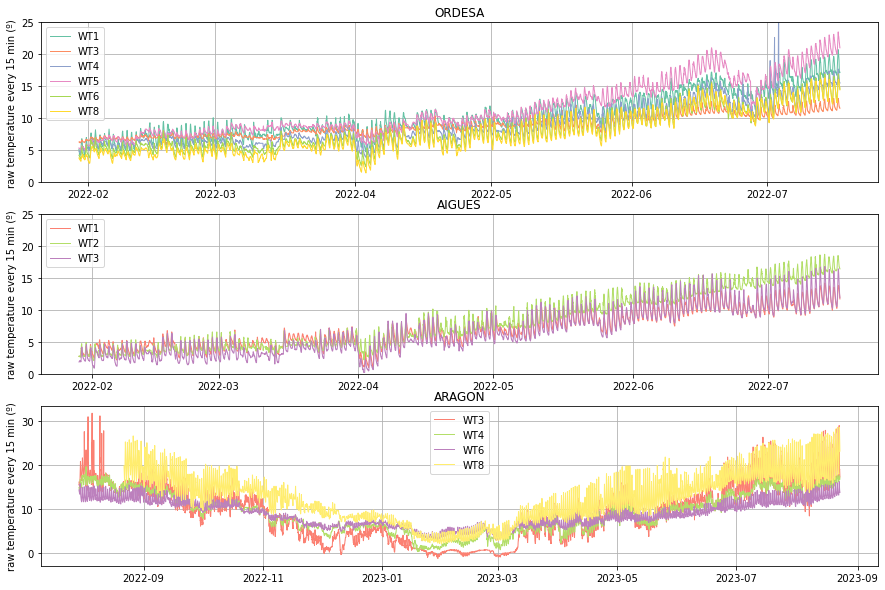

In [4]:
# raw

site_name = "ORDESA"
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
cmap = matplotlib.cm.get_cmap('Set2')
for ii, site_number in enumerate(data[site_name].keys()):
    plt.plot(data[site_name][site_number].date, data[site_name][site_number].temp, lw = 1, c = cmap((ii+1)*1./9), label=str(site_number))
plt.title(site_name)
plt.ylim([0,25])
plt.ylabel("raw temperature every 15 min (º)")
plt.grid(True)
plt.legend()

site_name = "AIGUES"
plt.subplot(3,1,2)
cmap = matplotlib.cm.get_cmap('Set3')
for ii, site_number in enumerate(data[site_name].keys()):
    plt.plot(data[site_name][site_number].date, data[site_name][site_number].temp, lw = 1, c = cmap((ii+1)*1./4), label=str(site_number))
plt.title(site_name)
plt.ylim([0,25])
plt.ylabel("raw temperature every 15 min (º)")
plt.grid(True)
#plt.xlim(dt.datetime(2022,2,1),dt.datetime(2022,8,1))
plt.legend()
#plt.tight_layout()


site_name = "ARAGON"
plt.subplot(3,1,3)
cmap = matplotlib.cm.get_cmap('Set3')
for ii, site_number in enumerate(data[site_name].keys()):
    plt.plot(data[site_name][site_number].date, data[site_name][site_number].temp, lw = 1, c = cmap((ii+1)*1./4), label=str(site_number))
plt.title(site_name)
#plt.ylim([0,25])
plt.ylabel("raw temperature every 15 min (º)")
plt.grid(True)
#plt.xlim(dt.datetime(2022,7,28),dt.datetime(2022,8,2))
plt.legend()
#plt.tight_layout()
plt.savefig(fig_folder+"/raw_temp.png",facecolor="w")


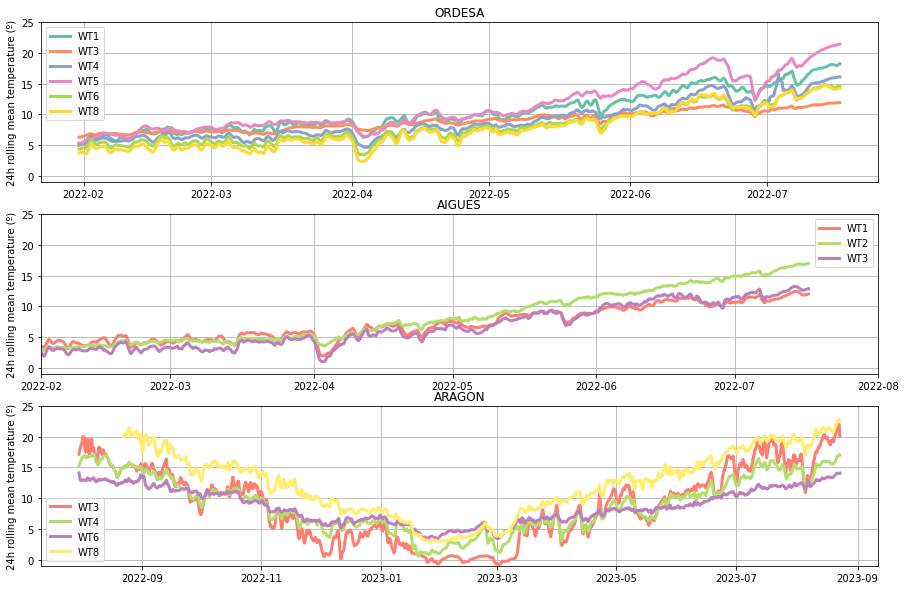

In [5]:
# rolling mean

site_name = "ORDESA"
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
cmap = matplotlib.cm.get_cmap('Set2')
for ii, site_number in enumerate(data[site_name].keys()):
    plt.plot(data[site_name][site_number].date, data[site_name][site_number].temp.rolling(4*24).mean(), lw = 3, c = cmap((ii+1)*1./9), label=str(site_number))
plt.title(site_name)
plt.ylim([-1,25])
plt.ylabel("24h rolling mean temperature (º)")
plt.grid(True)
plt.legend()

site_name = "AIGUES"
plt.subplot(3,1,2)
cmap = matplotlib.cm.get_cmap('Set3')
for ii, site_number in enumerate(data[site_name].keys()):
    plt.plot(data[site_name][site_number].date, data[site_name][site_number].temp.rolling(4*24).mean(), lw = 3, c = cmap((ii+1)*1./4), label=str(site_number))
plt.title(site_name)
plt.ylim([-1,25])
plt.ylabel("24h rolling mean temperature (º)")
plt.grid(True)
plt.xlim(dt.datetime(2022,2,1),dt.datetime(2022,8,1))
plt.legend()

site_name = "ARAGON"
plt.subplot(3,1,3)
cmap = matplotlib.cm.get_cmap('Set3')
for ii, site_number in enumerate(data[site_name].keys()):
    # to improve the resampling, set all to same timeline
    plt.plot(data[site_name][site_number].date, data[site_name][site_number].temp.rolling(2*24).mean(), lw = 3, c = cmap((ii+1)*1./4), label=str(site_number))
plt.title(site_name)
plt.ylim([-1,25])
plt.ylabel("24h rolling mean temperature (º)")
plt.grid(True)
#plt.xlim(dt.datetime(2022,2,1),dt.datetime(2022,8,1))
plt.legend()

#plt.tight_layout()
plt.savefig(fig_folder+"/rolling_mean_temp.png",facecolor="w")

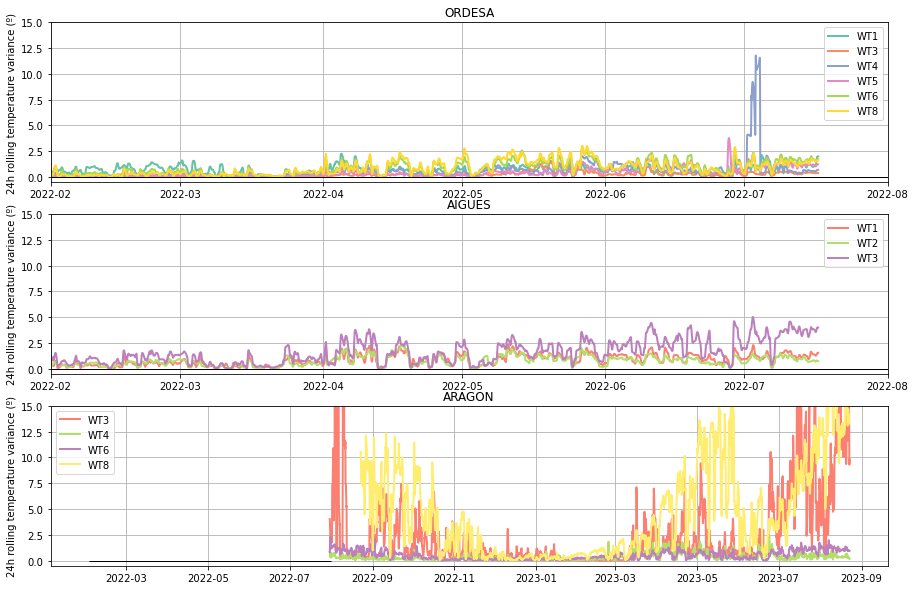

In [6]:
# rolling var

site_name = "ORDESA"
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
cmap = matplotlib.cm.get_cmap('Set2')
for ii, site_number in enumerate(data[site_name].keys()):
    plt.plot(data[site_name][site_number].date, data[site_name][site_number].temp.rolling(4*24).var(), lw = 2, c = cmap((ii+1)*1./9), label=str(site_number))
plt.title(site_name)
plt.ylim([-0.5,15])
plt.ylabel("24h rolling temperature variance (º)")
plt.grid(True)
plt.xlim(dt.datetime(2022,2,1),dt.datetime(2022,8,1))
plt.hlines(0,dt.datetime(2022,2,1),dt.datetime(2022,8,1),"k",lw=1)
plt.legend()

site_name = "AIGUES"
plt.subplot(3,1,2)
cmap = matplotlib.cm.get_cmap('Set3')
for ii, site_number in enumerate(data[site_name].keys()):
    plt.plot(data[site_name][site_number].date, data[site_name][site_number].temp.rolling(4*24).var(), lw = 2, c = cmap((ii+1)*1./4), label=str(site_number))
plt.title(site_name)
plt.ylim([-0.5,15])
plt.ylabel("24h rolling temperature variance (º)")
plt.grid(True)
plt.xlim(dt.datetime(2022,2,1),dt.datetime(2022,8,1))
plt.hlines(0,dt.datetime(2022,2,1),dt.datetime(2022,8,1),"k",lw=1)
plt.legend()


site_name = "ARAGON"
plt.subplot(3,1,3)
cmap = matplotlib.cm.get_cmap('Set3')
for ii, site_number in enumerate(data[site_name].keys()):
    plt.plot(data[site_name][site_number].date, data[site_name][site_number].temp.rolling(2*24).var(), lw = 2, c = cmap((ii+1)*1./4), label=str(site_number))
plt.title(site_name)
plt.ylim([-0.5,15])
plt.ylabel("24h rolling temperature variance (º)")
plt.grid(True)
#plt.xlim(dt.datetime(2022,2,1),dt.datetime(2022,8,1))
plt.hlines(0,dt.datetime(2022,2,1),dt.datetime(2022,8,1),"k",lw=1)
plt.legend()


#plt.tight_layout()
plt.savefig(fig_folder+"/rolling_var_temp.png",facecolor="w")

id                date    temp info0 info1 info2 info3 info4
422      423 2022-02-01 00:15:00   3.367   NaN   NaN   NaN   NaN   NaN
423      424 2022-02-01 00:30:00   3.367   NaN   NaN   NaN   NaN   NaN
424      425 2022-02-01 00:45:00   3.367   NaN   NaN   NaN   NaN   NaN
425      426 2022-02-01 01:00:00   3.367   NaN   NaN   NaN   NaN   NaN
426      427 2022-02-01 01:15:00   3.367   NaN   NaN   NaN   NaN   NaN
...      ...                 ...     ...   ...   ...   ...   ...   ...
16448  16449 2022-07-17 22:45:00  14.900   NaN   NaN   NaN   NaN   NaN
16449  16450 2022-07-17 23:00:00  14.804   NaN   NaN   NaN   NaN   NaN
16450  16451 2022-07-17 23:15:00  14.709   NaN   NaN   NaN   NaN   NaN
16451  16452 2022-07-17 23:30:00  14.709   NaN   NaN   NaN   NaN   NaN
16452  16453 2022-07-17 23:45:00  14.613   NaN   NaN   NaN   NaN   NaN

[16031 rows x 8 columns]